In [1]:
# import packages
import numpy as np
import pandas as pd
import scipy.signal
import librosa as lr
from librosa.display import waveshow, specshow
import matplotlib.pyplot as plt
import seaborn as sns
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
from sklearn.preprocessing import minmax_scale

/Users/girishhanumantha/Documents/GitHub/audio_anomaly_detection/venv/lib/python3.7/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

In [3]:
# dir setup
audio_dir = '/Users/girishhanumantha/Documents/Github/audio_anomaly_detection/data/external/real_radio_event/'
#sample_file = 'kegl-1.wav'
sample_file = 'WLKT.wav'
#sample_file = 'simpleLoop.wav'

In [6]:
# Extract time series from wav file
audio_ts, sr = lr.load(audio_dir + sample_file, sr=44100)

In [7]:
# Extract spectral features
# spectral centroid
spec_cent = lr.feature.spectral_centroid(y=audio_ts)[0]

# spectral rolloff
spec_rolloff = lr.feature.spectral_rolloff(y=audio_ts)[0]

# spectral bandwidth (p=2)
spec_band_2 = lr.feature.spectral_bandwidth(y=audio_ts, p=2)[0]

# spectral bandwidth (p=3)
spec_band_3 = lr.feature.spectral_bandwidth(y=audio_ts, p=3)[0]

# Spectral Flux - use library pyAudioAnalysis
#spec_flux = ShortTermFeatures.feature_extraction(audio_ts, sampling_rate=22050, window=4096, step=512)[0][6]

# Rythmic Feature - Tempo
tempo = lr.beat.tempo(y=audio_ts, sr=sr, aggregate=None)

# mel cepstral coefficient
mcc = lr.feature.mfcc(y=audio_ts, n_mfcc=5)

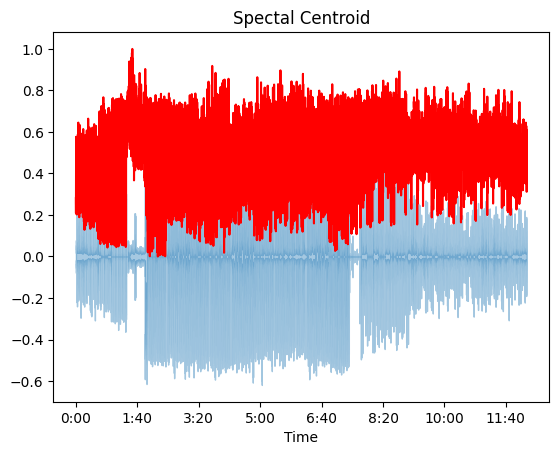

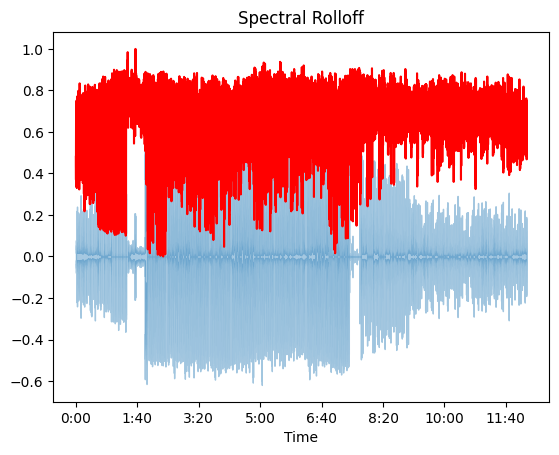

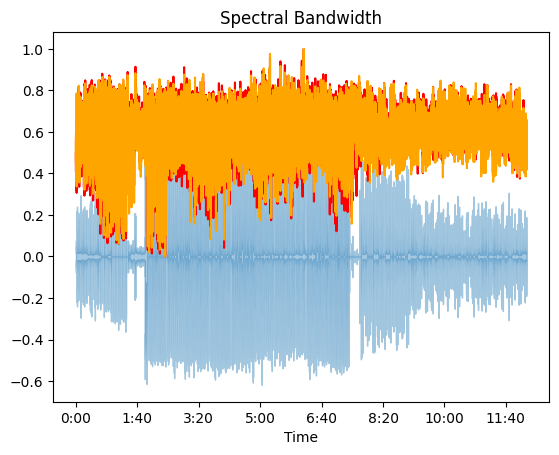

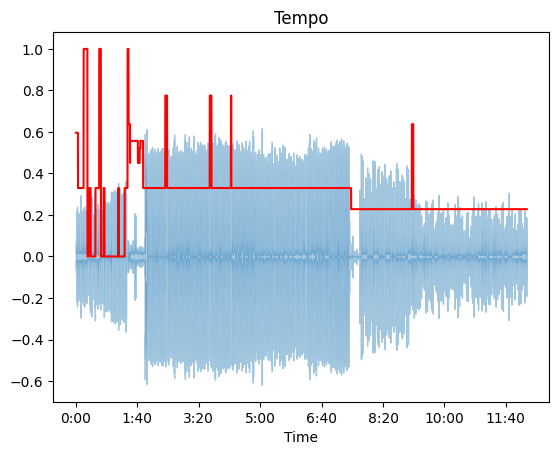

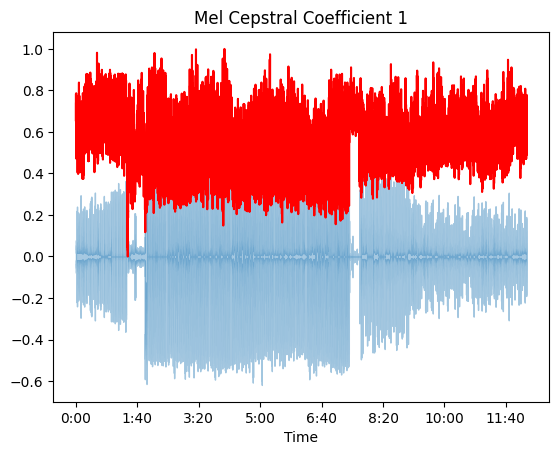

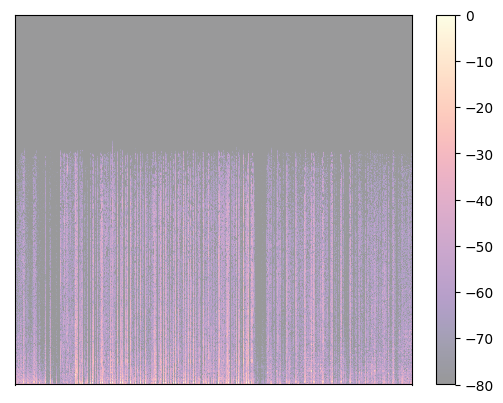

In [11]:
# Plot features
frames = range(len(spec_cent))
t = lr.frames_to_time(frames)

# plot spectral centroid
waveshow(audio_ts, sr=22050, alpha=0.4)
plt.plot(t, normalize(spec_cent), color='r')
plt.title('Spectal Centroid')
plt.show()

#plot spectral rolloff
waveshow(audio_ts, sr=22050, alpha=0.4)
plt.plot(t, normalize(spec_rolloff), color='r')
plt.title('Spectral Rolloff')
plt.show()

# plot spectral bandwidth
waveshow(audio_ts, sr=22050, alpha=0.4)
plt.plot(t, normalize(spec_band_2), color='r')
plt.plot(t, normalize(spec_band_3), color='orange')
plt.title('Spectral Bandwidth')
plt.show()

# plot spectral flux
#waveshow(audio_ts, sr=22050, alpha=0.4)
#plt.plot(t[:-4], normalize(spec_flux), color='r')
#plt.show()

#Plot tempo
waveshow(audio_ts, sr=22050, alpha=0.4)
plt.plot(t, normalize(tempo), color='r')
plt.title('Tempo')
plt.show()


# plot mccf
waveshow(audio_ts, sr=22050, alpha=0.4)
plt.plot(t, normalize(mcc[4]), color='r')
#plt.plot(t, normalize(spec_band_3), color='orange')
plt.title('Mel Cepstral Coefficient 1')
plt.show()

# plot spectogram
plt.figure()
specshow(lr.amplitude_to_db(np.abs(lr.stft(audio_ts)), ref=np.max), sr=22050, alpha=0.4)
plt.colorbar()

In [7]:
len(spec_cent)

259

In [9]:
# Temporal Features
zero_cross_rate = lr.feature.zero_crossing_rate(audio_ts)[0]

In [9]:
print([len(spec_cent), len(spec_rolloff), len(spec_band_2), len(spec_band_3), len(tempo), len(mcc[0]), len(zero_cross_rate)])

[259, 259, 259, 259, 259, 259, 259]


In [12]:
from pywt import dwt
def get_octave_freq_bands(audio_ts):
    return dwt(data=audio_ts, wavelet= 'db1')

In [16]:
cA, cD = get_octave_freq_bands(audio_ts)

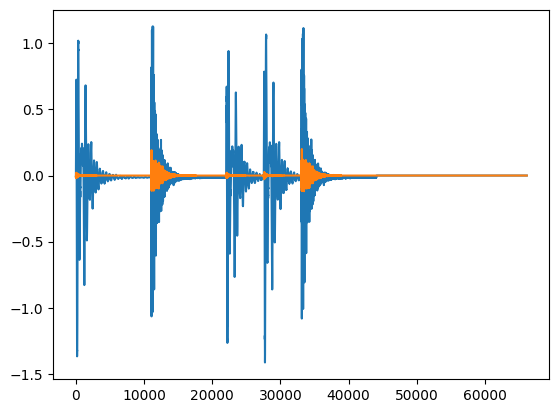

In [18]:
plt.plot(cA)
plt.plot(cD)

In [84]:
def get_enhanced_autocorrelation(audio_ts):
    # Full wave rectification
    audio_ts_abs = np.abs(audio_ts)

    # #Low-Pass Filtering
    # audio_ts_ea = np.zeros(shape=(len(audio_ts)))
    # alpha = 0.99
    # for i in range(len(audio_ts)):
    #     if i == 0:
    #         audio_ts_ea[i] = (1 - alpha) * audio_ts_abs[i]
    #     else:
    #         audio_ts_ea[i] = (1 - alpha) * audio_ts_abs[i] + (alpha) * audio_ts_ea[i - 1]
    #
    # # Down Sampling
    # downsample_factor = 16
    # audio_ts_down_sample = audio_ts_ea[0:len(audio_ts):downsample_factor]
    #
    # # Mean Removal
    # #print(np.mean(audio_ts_down_sample))
    # audio_ts_down_sample = audio_ts_down_sample - np.mean(audio_ts_down_sample)
    #
    # #Compute AutoCorrelation
    # audio_ts_autocorr = np.correlate(audio_ts_down_sample, audio_ts_down_sample, mode='full')

    return audio_ts_abs

In [ ]:
hop_length = 512
oenv = lr.onset.onset_strength(y=audio_ts, sr=sr, hop_length=hop_length)
tempogram = lr.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)
x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sr, num=tempogram.shape[0])
plt.plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
print(len(np.mean(tempogram, axis=1)))

In [ ]:
plt.plot(lr.util.normalize(lr.autocorrelate(oenv, max_size=tempogram.shape[0])))

In [ ]:
plt.plot(get_enhanced_autocorrelation(audio_ts))

In [13]:
# fn to process audio file and return instances with features
def extract_features(audio_ts, sr=22050):
    # spectral centroid
    spec_cent = lr.feature.spectral_centroid(y=audio_ts)[0]

    # spectral rolloff
    spec_rolloff = lr.feature.spectral_rolloff(y=audio_ts)[0]

    # spectral bandwidth (p=2)
    spec_band_2 = lr.feature.spectral_bandwidth(y=audio_ts, p=2)[0]

    # spectral bandwidth (p=3)
    spec_band_3 = lr.feature.spectral_bandwidth(y=audio_ts, p=3)[0]

    # tempo - rythmic feature
    tempo = lr.beat.tempo(y=audio_ts, sr=sr, aggregate=None)

    # mel cepstral coefficient
    num_mcc_coeff = 5
    mcc = lr.feature.mfcc(y=audio_ts, n_mfcc=num_mcc_coeff)

    # zero crossing rate
    zero_cross_rate = lr.feature.zero_crossing_rate(y=audio_ts)[0]

    # caculate tempo
    tempo = lr.beat.tempo(y=audio_ts, sr=sr, aggregate=None)

    feature_dict = {'spectral_centroid': spec_cent, 'spectral_rolloff': spec_rolloff,
                         'spectral_bandwidth_2': spec_band_2, 'spectral_bandwith_3': spec_band_3,
                    'zero_crossing_rate': zero_cross_rate, 'tempo': tempo}
    mccf_dict = {'mcc_' + str(i+1): mcc[i] for i in list(range(num_mcc_coeff))}
    feature_dict.update(mccf_dict)
    return pd.DataFrame(feature_dict)

In [99]:
from numpy.lib.stride_tricks import sliding_window_view
def extract_features_autoencoder(audio_ts, sr=22050, n_mels=128, n_frames=5):
    """
    Function to extract mel spectogram based features for training an autoencoder

    audio_ts: time waveform expressed as a time series
    sr: sampling rate

    """
    mel_spec = lr.feature.melspectrogram(y=audio_ts, n_mels=n_mels)
    mel_spec = np.transpose(mel_spec)
    df = pd.DataFrame()
    for i in np.arange(n_frames-1, -1, -1):
        print(i)
        df= pd.concat([df, pd.DataFrame(mel_spec).shift(i)], axis=1)

    df.columns = ['feature_' + str(i+1) for i in range(n_frames*n_mels)]
    return df.dropna()

In [100]:
df_test = extract_features_autoencoder(audio_ts)

4
3
2
1
0


In [101]:
df_test

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_631,feature_632,feature_633,feature_634,feature_635,feature_636,feature_637,feature_638,feature_639,feature_640
4,0.048297,0.040267,0.020070,0.009094,0.005162,0.001035,0.000791,0.001458,0.001496,0.000686,...,7.322512e-12,2.567192e-12,3.445371e-12,3.368980e-12,2.591496e-12,3.288020e-12,1.328907e-12,6.407094e-12,7.377792e-12,2.397593e-12
5,3.090406,2.094742,0.169590,0.118610,0.277144,0.125036,0.054625,0.010013,0.013031,0.070095,...,4.138584e-12,8.675664e-13,2.079598e-12,1.696081e-12,1.519870e-12,2.365127e-12,8.221113e-13,3.641306e-12,4.305889e-12,1.265132e-12
6,9.426573,14.403938,2.743426,0.291010,0.609045,0.278679,0.195612,0.060411,0.029599,0.197196,...,9.016041e-13,2.196534e-13,1.009450e-12,6.418752e-13,4.172101e-13,6.363869e-13,1.981337e-13,1.105623e-12,1.539391e-12,3.366800e-13
7,4.399014,15.771943,3.832230,0.315003,0.231613,0.064089,0.122683,0.094516,0.074545,0.115052,...,2.104501e-13,1.706441e-13,2.888855e-13,3.057040e-13,3.196297e-13,3.022022e-13,1.574541e-13,2.661639e-13,2.730783e-13,1.542302e-13
8,1.374021,4.969691,0.638954,0.458136,0.144315,0.012422,0.080423,0.059518,0.073004,0.113369,...,1.897230e-13,2.490516e-13,3.561173e-13,3.187407e-13,3.658143e-13,3.324371e-13,1.552652e-13,2.882886e-13,1.960379e-13,1.531255e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31610,1.060628,0.348626,0.057279,0.044967,0.018236,0.063939,0.052835,0.017560,0.041828,0.024561,...,1.711565e-12,3.437615e-12,1.651916e-12,2.208379e-12,3.037301e-12,1.737454e-12,2.966246e-12,2.018938e-12,1.515867e-12,2.433825e-12
31611,0.323752,0.095325,0.015926,0.024469,0.024875,0.015474,0.042672,0.041086,0.075948,0.018093,...,8.539542e-13,1.294575e-12,7.362629e-13,1.093516e-12,1.119291e-12,7.783954e-13,1.206605e-12,9.583211e-13,7.806375e-13,8.791224e-13
31612,0.074378,0.025297,0.007482,0.018119,0.031671,0.018618,0.019313,0.052915,0.188943,0.115273,...,7.267823e-13,1.347218e-12,6.513830e-13,8.530910e-13,1.088228e-12,1.018321e-12,1.347200e-12,8.740063e-13,8.164123e-13,8.396177e-13
31613,0.075399,0.038543,0.019823,0.028728,0.017176,0.045353,0.031730,0.142046,0.956866,0.521131,...,4.773777e-09,4.121218e-09,3.652141e-09,3.309308e-09,3.050982e-09,2.848521e-09,2.696176e-09,2.582868e-09,2.507940e-09,2.461146e-09


In [ ]:
def extract_features_batch(audio_wav_list):
    df_train = pd.DataFrame()
    for wav_file in audio_wav_list:
        audio_ts, sr = lr.load(wav_file)
        df_temp = extract_features(audio_ts)
        df_temp['audio_file'] = wav_file
        df_temp['audio_index'] = df_temp.index
        df_train = pd.concat([df_train, df_temp])
    return df_train

In [59]:
def texturize_features(audio_ts, sr, texture_window):
    analysis_window = (np.power(10, 6)) / (sr)
    num_frames = int(texture_window / analysis_window)
    features = extract_features(audio_ts)
    features_rolling = features.rolling(window=num_frames)
    agg_features = pd.concat([features_rolling.apply(np.mean), features_rolling.apply(np.var)], axis=1)
    agg_features.columns = [i + '_rolling_mean' for i in features.columns] + [i + '_rolling_var' for i in
                                                                              features.columns]
    return agg_features

In [61]:
df_texture = texturize_features(audio_ts,22050,1000)

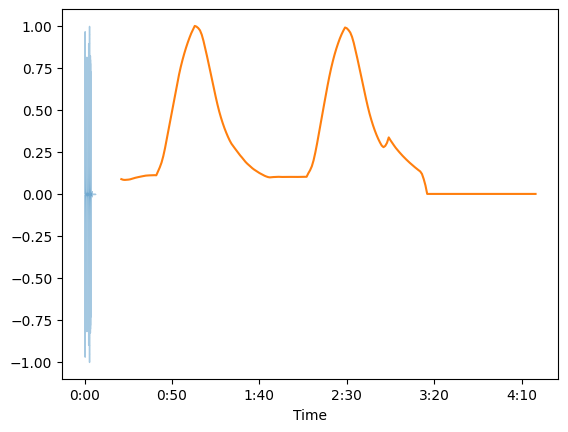

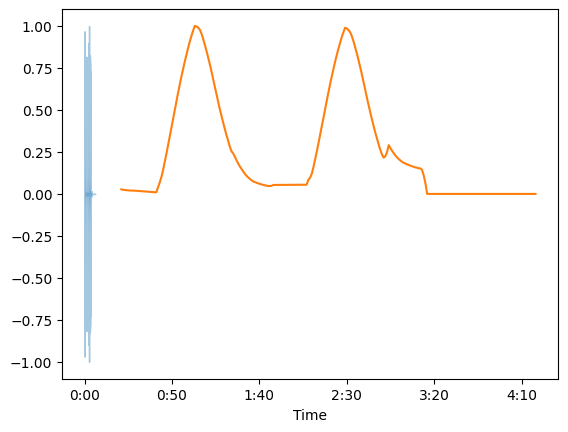

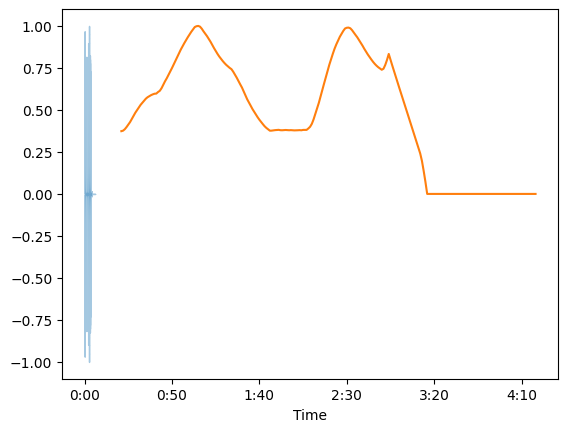

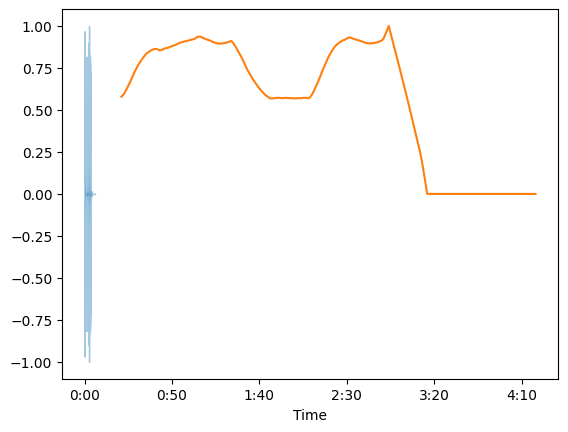

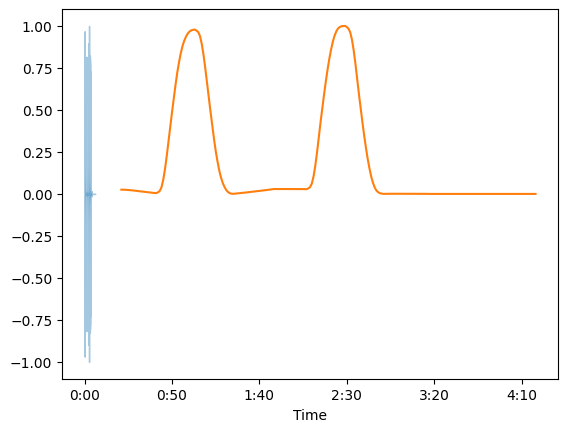

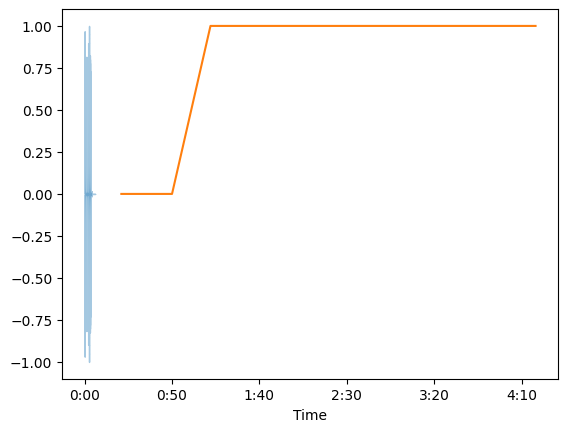

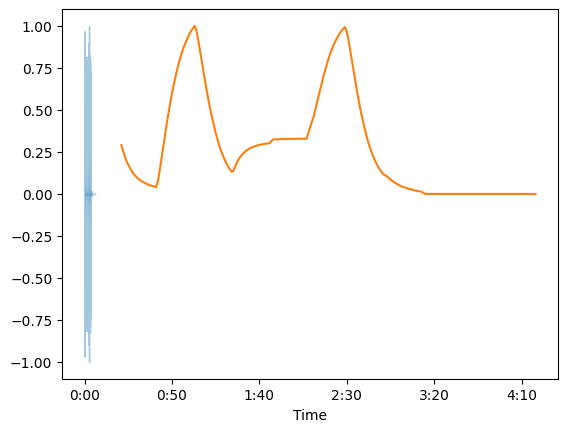

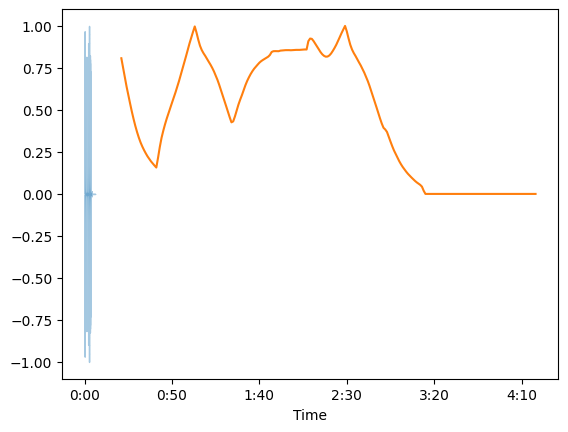

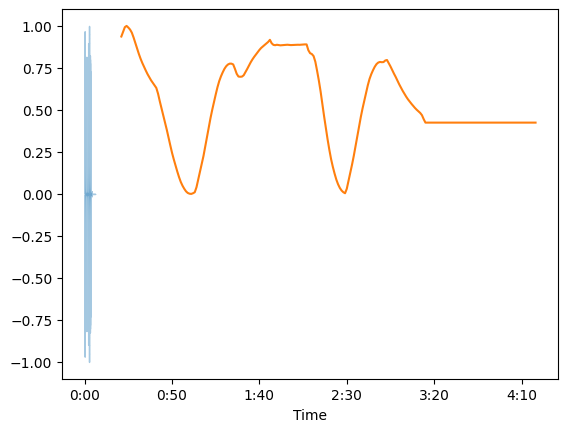

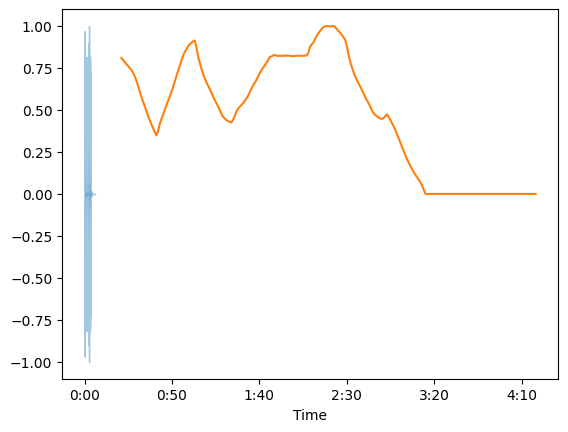

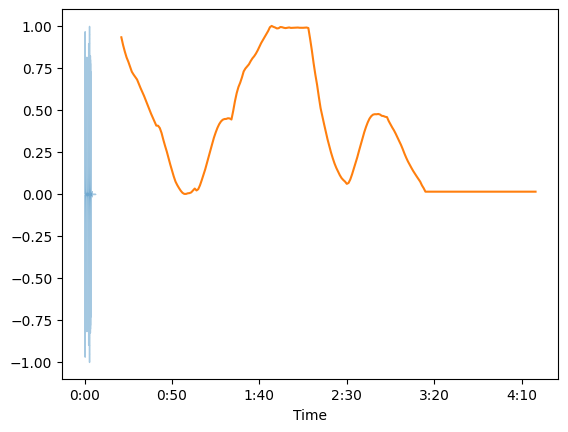

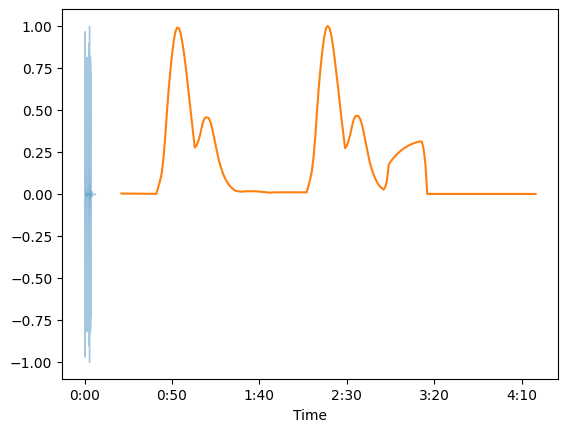

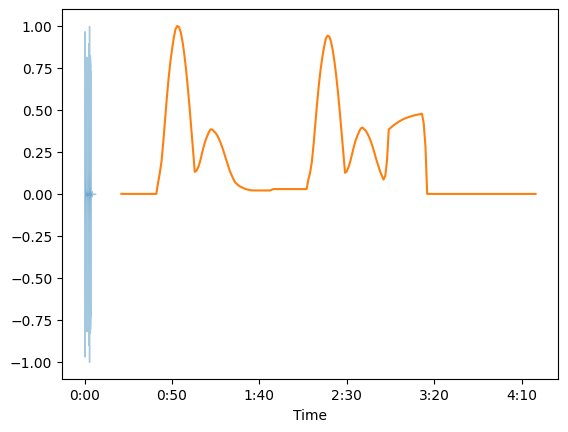

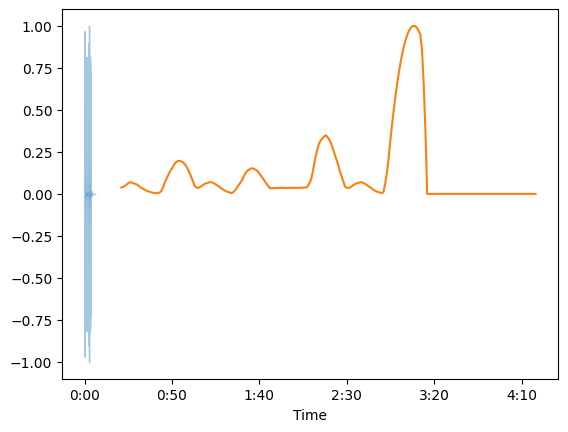

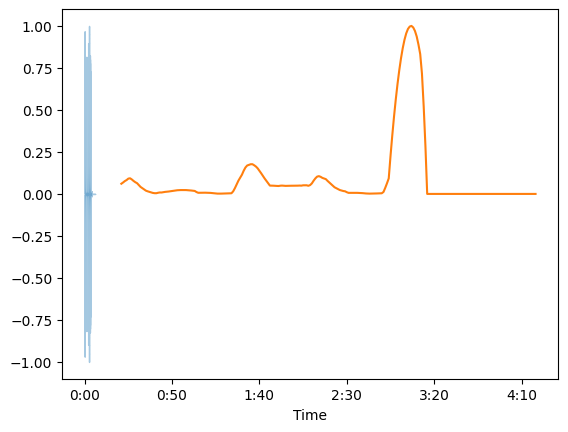

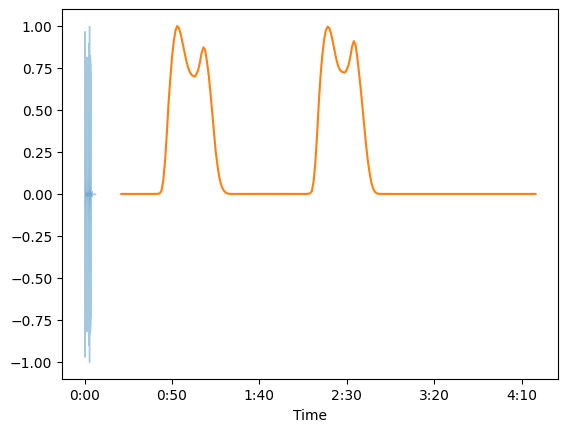

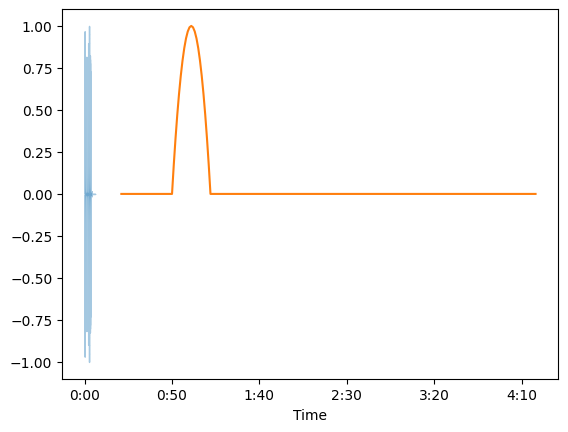

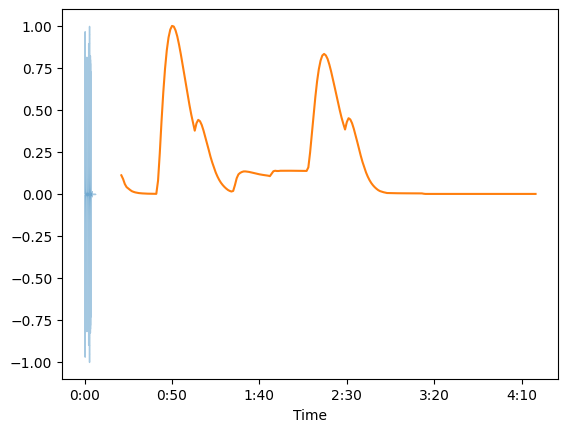

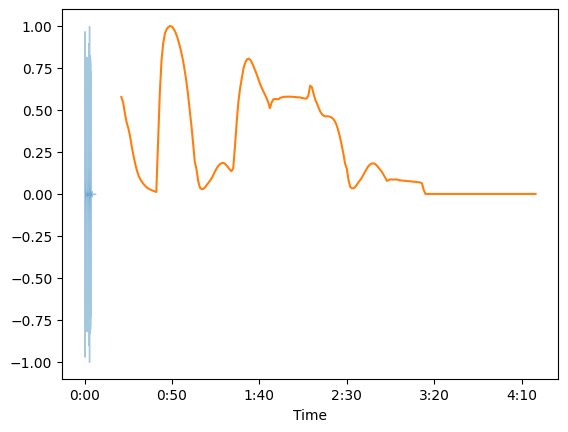

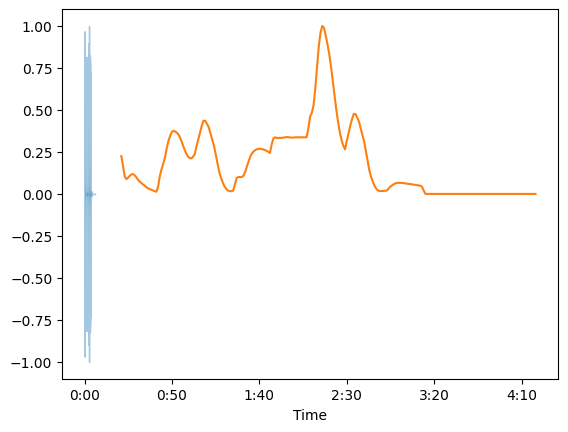

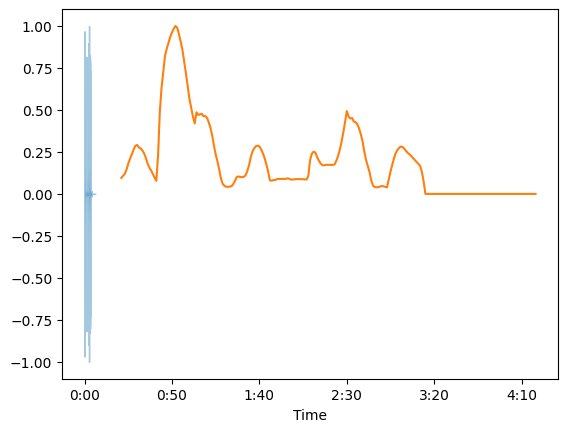

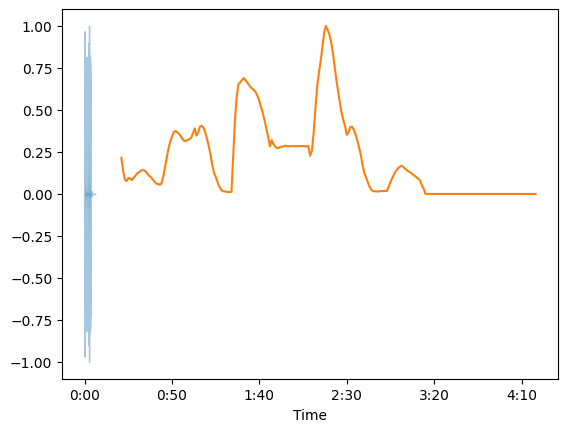

In [63]:
for col in df_texture.columns:
    waveshow(audio_ts, sr=22050, alpha=0.4)
    plt.plot(normalize(df_texture[col]))
    plt.show()

In [167]:
train_dir = '/Users/girishhanumantha/Documents/Github/audio_anomaly_detection/data/external/train_data/'
test_dir = '/Users/girishhanumantha/Documents/Github/audio_anomaly_detection/data/external/test_data/'

In [179]:
import os
df_train = pd.DataFrame()
for audio_file in os.listdir(train_dir):
    print(audio_file)
    if '.wav' in audio_file:
        audio_ts, sr = lr.load(train_dir + audio_file)
        df_temp = extract_features(audio_ts)
        df_temp['audio_file'] = audio_file
        df_temp['audio_index'] = df_temp.index
        df_train = pd.concat([df_train, df_temp])

KEGL_147_inf.wav
KZPS_67_inf.wav
KZPS_77_inf.wav
KDMX_92_inf.wav
KDMX_82_inf.wav
WAXQ_112_inf.wav
WAXQ_102_inf.wav
KZPS_15_inf.wav
KEGL_125_inf.wav
KEGL_135_inf.wav
WAXQ_17_inf.wav
WHTZ_92_inf.wav
WHTZ_82_inf.wav
WAXQ_65_inf.wav
WAXQ_75_inf.wav
KDMX_7_inf.wav
KDMX_32_inf.wav
KDMX_22_inf.wav
WHTZ_7_inf.wav
WHTZ_142_inf.wav
KZPS_142_inf.wav
KEGL_15_inf.wav
WHTZ_32_inf.wav
WHTZ_22_inf.wav
KEGL_77_inf.wav
KEGL_67_inf.wav
KZPS_5_inf.wav
KEGL_82_inf.wav
KEGL_92_inf.wav
WAXQ_52_inf.wav
WAXQ_42_inf.wav
.DS_Store
KEGL_112_inf.wav
KEGL_102_inf.wav
WAXQ_125_inf.wav
KZPS_32_inf.wav
KDMX_127_inf.wav
KZPS_22_inf.wav
WAXQ_135_inf.wav
KDMX_137_inf.wav
WAXQ_147_inf.wav
KDMX_145_inf.wav
KZPS_107_inf.wav
KZPS_117_inf.wav
WHTZ_15_inf.wav
WHTZ_117_inf.wav
WHTZ_107_inf.wav
WHTZ_67_inf.wav
WHTZ_77_inf.wav
KEGL_22_inf.wav
KEGL_32_inf.wav
KDMX_15_inf.wav
KZPS_92_inf.wav
KZPS_82_inf.wav
KDMX_67_inf.wav
KDMX_77_inf.wav
WAXQ_22_inf.wav
WAXQ_32_inf.wav
KZPS_42_inf.wav
KZPS_52_inf.wav
WAXQ_145_inf.wav
KDMX_147_inf.

In [181]:
df_train.to_pickle('train_with_featues.pkl')

In [182]:
df_test = pd.DataFrame()
for audio_file in os.listdir(test_dir):
    print(audio_file)
    if '.wav' in audio_file:
        audio_ts, sr = lr.load(test_dir + audio_file)
        df_temp = extract_features(audio_ts)
        df_temp['audio_file'] = audio_file
        df_temp['audio_index'] = df_temp.index
        df_test = pd.concat([df_test, df_temp])

KEGL_111_popping.wav
KDMX_111_popping.wav
WHTZ_141_popping.wav
KEGL_71_popping.wav
WHTZ_131_popping.wav
KZPS_111_popping.wav
WHTZ_11_popping.wav
WHTZ_61_popping.wav
WAXQ_1_popping.wav
KEGL_101_popping.wav
KEGL_11_popping.wav
WHTZ_121_popping.wav
KEGL_61_popping.wav
WHTZ_71_popping.wav
KZPS_101_popping.wav
KDMX_101_popping.wav
KZPS_1_popping.wav
WAXQ_71_popping.wav
KDMX_71_popping.wav
KZPS_11_popping.wav
WAXQ_101_popping.wav
KZPS_61_popping.wav
WAXQ_11_popping.wav
KDMX_61_popping.wav
WAXQ_61_popping.wav
KDMX_11_popping.wav
KEGL_1_popping.wav
KZPS_71_popping.wav
WAXQ_111_popping.wav
WHTZ_91_popping.wav
KDMX_31_popping.wav
WAXQ_41_popping.wav
KEGL_81_popping.wav
KDMX_41_popping.wav
WAXQ_31_popping.wav
WAXQ_141_popping.wav
KZPS_21_popping.wav
WAXQ_131_popping.wav
KZPS_51_popping.wav
KDMX_1_popping.wav
WHTZ_81_popping.wav
WAXQ_21_popping.wav
WHTZ_1_popping.wav
KDMX_51_popping.wav
KEGL_91_popping.wav
WAXQ_51_popping.wav
KDMX_21_popping.wav
KZPS_41_popping.wav
WAXQ_121_popping.wav
KZPS_31_pop

In [183]:
df_test.to_pickle('test_with_featues.pkl')

In [191]:
df_test.columns

Index(['spectral_centroid', 'spectral_rolloff', 'spectral_bandwidth_2',
       'spectral_bandwith_3', 'zero_crossing_rate', 'mcc_1', 'mcc_2', 'mcc_3',
       'mcc_4', 'mcc_5', 'mcc_6', 'mcc_7', 'mcc_8', 'mcc_9', 'mcc_10',
       'mcc_11', 'mcc_12', 'mcc_13', 'audio_file', 'audio_index'],
      dtype='object')

In [192]:
feature_cols = ['spectral_centroid', 'spectral_rolloff', 'spectral_bandwidth_2',
                'spectral_bandwith_3', 'zero_crossing_rate', 'mcc_1', 'mcc_2', 'mcc_3',
                'mcc_4', 'mcc_5', 'mcc_6', 'mcc_7', 'mcc_8', 'mcc_9', 'mcc_10',
                'mcc_11', 'mcc_12', 'mcc_13']

In [193]:
# Scale Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(df_train[feature_cols]), columns=feature_cols, index=df_train.index)
X_test = pd.DataFrame(scaler.transform(df_test[feature_cols]), columns=feature_cols, index=df_test.index)

In [194]:
X_train.describe()

,spectral_centroid,spectral_rolloff,spectral_bandwidth_2,spectral_bandwith_3,zero_crossing_rate,mcc_1,mcc_2,mcc_3,mcc_4,mcc_5,mcc_6,mcc_7,mcc_8,mcc_9,mcc_10,mcc_11,mcc_12,mcc_13
count,193950.000000,193950.000000,193950.000000,193950.000000,193950.000000,193950.000000,193950.000000,193950.000000,193950.000000,193950.000000,193950.000000,193950.000000,193950.000000,193950.000000,193950.000000,193950.000000,193950.000000,193950.000000
mean,0.290407,0.567835,0.566396,0.630905,0.162375,0.719954,0.540985,0.591558,0.493179,0.529262,0.613327,0.541132,0.559167,0.560734,0.526217,0.462209,0.554129,0.454890
std,0.102566,0.176469,0.143137,0.130069,0.089950,0.131256,0.090452,0.088538,0.095003,0.084485,0.078351,0.099142,0.087843,0.096788,0.086279,0.079015,0.091652,0.080286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.225980,0.440567,0.484345,0.567621,0.104204,0.683171,0.493755,0.546479,0.434585,0.481315,0.574146,0.481085,0.508964,0.506212,0.475550,0.415468,0.502914,0.404599
50%,0.287666,0.598691,0.597031,0.661236,0.151569,0.757182,0.536836,0.596182,0.489349,0.527592,0.619955,0.541937,0.566017,0.567272,0.530330,0.462888,0.561014,0.453254
75%,0.344894,0.702290,0.668315,0.719896,0.200710,0.800403,0.586185,0.640965,0.549257,0.574339,0.661074,0.602267,0.616043,0.623420,0.581418,0.510027,0.614125,0.503300
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# fit density based LOF model
from sklearn.neighbors import LocalOutlierFactor
model_lof = LocalOutlierFactor().fit(X_train)

In [199]:
# score training and test data - LOF
train_score_lof = pd.DataFrame(model_lof.fit_predict(X_train), columns=['outlier_score'], index=X_train.index)
test_score_lof = pd.DataFrame(model_lof.predict(X_test), columns=['is_inlier'], index=X_test.index, novelty=True)

AttributeError: predict is not available when novelty=False, use fit_predict if you want to predict on training data. Use novelty=True if you want to use LOF for novelty detection and predict on new unseen data.

In [ ]:
# fit tree based isolation forest model
from sklearn.ensemble import IsolationForest
model_isofor = IsolationForest.fit(df_train)

In [ ]:
# score training and test data - isolation forest
train_score_isofor = pd.DataFrame(model_lof.predict(X_train), columns=['outlier_score'], index=X_train.index)
test_score_isofor = pd.DataFrame(model_lof.predict(X_test), columns=['is_inlier'], index=X_test.index)

In [ ]:
pd.DataFrame({'audio_file': df_train[train_score_lof['outlier_score'] == -1]['audio_file'], 'audio_index': df_train[train_score_lof['outlier_score'] == -1]['audio_index'], 'outlier_flag': train_score_lof[train_score_lof['outlier_score'] == -1]['outlier_score']})